# Project - Crypto Price Prediction Machine Learning Model

Submitted By: Raymund Vincent Ricabar

Dataset is taken from Kaggle [link](https://www.kaggle.com/datasets/georgezakharov/historical-data-on-the-trading-of-cryptocurrencies)

This is historical data on cryptocurrency tradings for the period from 2016-01-01 to 2022-01-08, and the goal is to predict the price of digital currencies. 

*Due to the size of the dataset, I am getting memory errors in Google Colab, and is the reason I am using a local Jupyter Notebook for this project.*

In [79]:
# imports
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.impute import SimpleImputer

# import custom functions
from machine_learning_template.dataset_loading import _load_local_dataset
from machine_learning_template.utils import get_repo_path

In [35]:
# set filename and type and get the file path
filename = 'crypto_tradinds'
file_type = 'csv'
root_dir = get_repo_path(1)
path = f'{root_dir}/data_files/{filename}.{file_type}'

# load the dataset found in the local directory, and set columns
cols = ['trade_date','volume','price_usd','market_cap','capitalization_change_1_day','USD_price_change_1_day','BTC_price_change_1_day','crypto_name','crypto_type','ticker']
df = _load_local_dataset(path, cols=cols)
df.head()

This is repo dir from _util file: H:\barokie\coding-dojo-ds\Project\crypto_model
this dataset shape of (2382643, 10) has 23 duplicated rows
removing 23 duplicated rows


,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker
0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC
1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC
2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC
3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC
4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC


In [36]:
# get data info
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382620 entries, 0 to 2382642
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   trade_date                   2382620 non-null  object 
 1   volume                       2382620 non-null  float64
 2   price_usd                    2382620 non-null  float64
 3   market_cap                   2382620 non-null  float64
 4   capitalization_change_1_day  2382620 non-null  float64
 5   USD_price_change_1_day       2382620 non-null  float64
 6   BTC_price_change_1_day       2382620 non-null  float64
 7   crypto_name                  2223794 non-null  object 
 8   crypto_type                  2223794 non-null  float64
 9   ticker                       2223794 non-null  object 
dtypes: float64(7), object(3)
memory usage: 200.0+ MB


In [51]:
# column selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# imputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(df)
imputed_array = imputer.transform(df)
imputed_df = pd.DataFrame(imputed_array, columns = imputer.feature_names_in_)


**Impute missing values with most frequent since this are objects and the numeric one is just 1 and 0 values.**

In [66]:
# convert numbers back to float after imputing
num_cols = df[num_selector].columns
for col in num_cols:
    imputed_df[col] = pd.to_numeric(imputed_df[col]).astype('float')

# convert trade date to datetime
imputed_df['trade_date'] = pd.to_datetime(imputed_df['trade_date'], format='%Y-%m-%d')

print(imputed_df.info(show_counts=True))
imputed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382620 entries, 0 to 2382619
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   trade_date                   2382620 non-null  datetime64[ns]
 1   volume                       2382620 non-null  float64       
 2   price_usd                    2382620 non-null  float64       
 3   market_cap                   2382620 non-null  float64       
 4   capitalization_change_1_day  2382620 non-null  float64       
 5   USD_price_change_1_day       2382620 non-null  float64       
 6   BTC_price_change_1_day       2382620 non-null  float64       
 7   crypto_name                  2382620 non-null  object        
 8   crypto_type                  2382620 non-null  float64       
 9   ticker                       2382620 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 181.8+ MB
None


,trade_date,volume,price_usd,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker
0,2016-01-01,36278900.0,434.33,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC
1,2016-01-02,30096600.0,433.44,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC
2,2016-01-03,39633800.0,430.01,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC
3,2016-01-04,38477500.0,433.09,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC
4,2016-01-05,34522600.0,431.96,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC


In [104]:
# foramtter
def bil_b(x, pos):
    return f"${x*1e-9:,.2f}B"

def mil_m(x, pos):
    return f"${x*1e-6:,.2f}M"

def hun_k(x, pos):
    return f"${x*1e-3:,.2f}K"

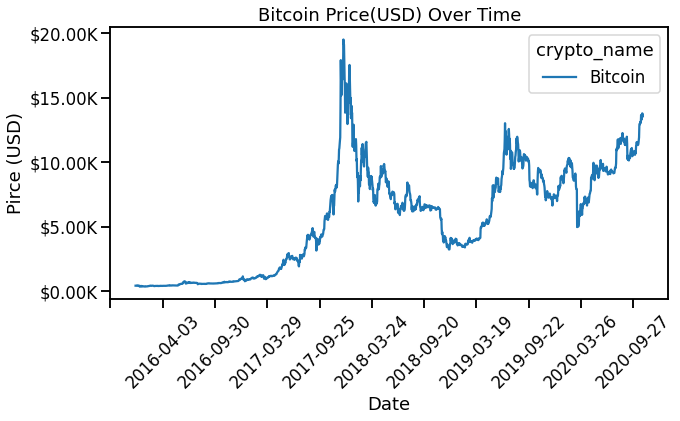

In [93]:
# filter just bitcoin data
crypto_bitcoin = df.loc[df['crypto_name']=='Bitcoin',:]

# plot timeseries prices by crypto_name
# sns.set_context('talk')
price_fmt_1k = FuncFormatter(hun_k)
fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(x = 'trade_date', y = 'price_usd', hue = 'crypto_name', data = crypto_bitcoin)
ax.yaxis.set_major_formatter(price_fmt_1k)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 180))
plt.xticks(rotation=45)

ax.set(title = 'Bitcoin Price(USD) Over Time', ylabel='Pirce (USD)', xlabel='Date')
plt.show()

*Here we are seeing the trend of bitcoin prices over time*

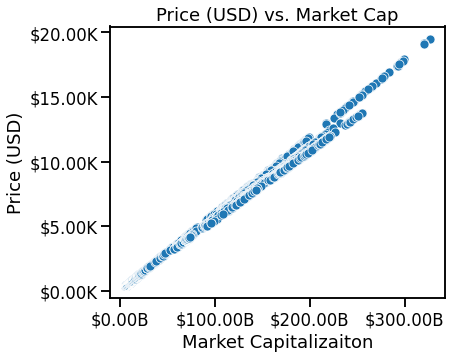

In [107]:
# boxplot
fig, ax = plt.subplots(figsize = (6,5))
price_fmt_1b = FuncFormatter(bil_b)
sns.scatterplot(data = crypto_bitcoin, x = 'market_cap', y = 'price_usd')
ax.yaxis.set_major_formatter(price_fmt_1k)
ax.xaxis.set_major_formatter(price_fmt_1b)

ax.set(title = 'Price (USD) vs. Market Cap', xlabel='Market Capitalizaiton', ylabel = 'Price (USD)')
plt.show()

*We can observe the price to increase as the Market Capitalization increases*

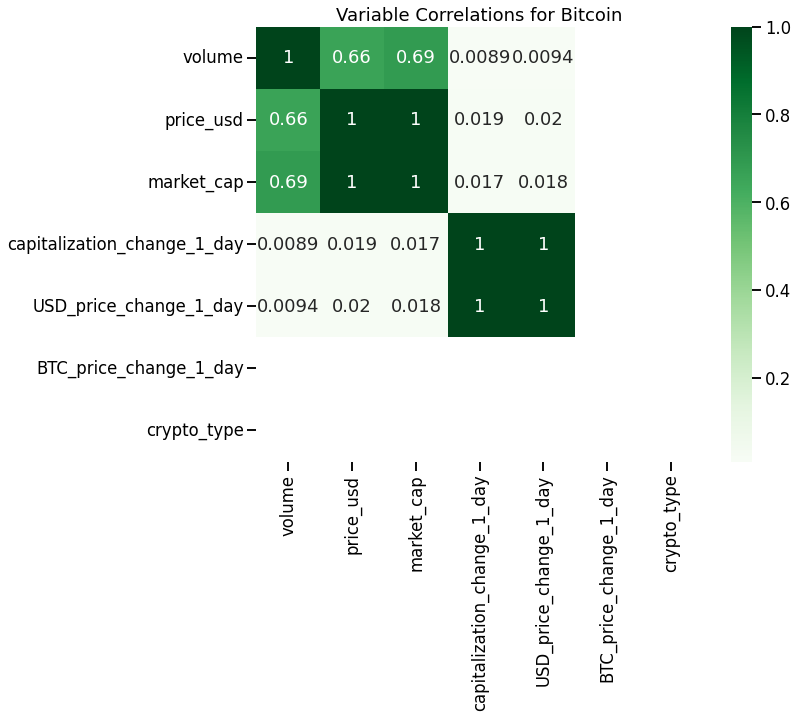

In [116]:
cor = crypto_bitcoin.corr()
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(cor, cmap='Greens', annot = True)
ax.set(title = 'Variable Correlations for Bitcoin')
plt.show()

*We can observe that multiple variables are correlated like: `market_cap and price`, `price and volume`, `volume and market_cap`, also the `capitalization_change_1_day and USD_price_change_1_day`.*